# This notebook combines the BiCEP results from anorthosite and diabase together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline
from IPython.display import Image

## anorthosite and diabase cooling unit pair

<center>
    
| Cooling unit #| AX sites| BD sites | Note |
| :------------- | :----------: | -----------: | -----------: |
| 1 | AX1 | BD1 | This xenolith site is hosted by BD1 diabase site and their directions agree very well|
| 2 | AX3, AX4, AX5, AX6, AX7, AX8, AX9, AX10 | BD2 | All of these xenoliths are hosted by the same Carlton Peak BD2 sill |
| 3 | AX11, AX13 | BD3 | These two anorthosite xenoliths are hosted by the same Kennedy Creek BD3 diabase sill | 
| 4 | AX12, AX14 | BD4 | These two anorthosite xenoliths are in close proximity hosted by BD4 diabase sill |
| 5 | AX15, AX16, AX17, AX18 | BD5 | These anorthosite xenoliths are in close proximity hosted by a Silver Bay BD5 diabase sill |
| 6 | AX19 | BD6 | This xenolith site is hosted by BD6 diabase site and their directions agree very well |
| 7 | AX20 | BD7 | This xenolith site is hosted by BD7 diabase site and their directions agree very well |
| 8 | AX22 | BD10| This xenolith site is hosted by BD10 diabase site and their directions agree very well |
| 9 | AX21 | | This xenolith site is about 300 meters from BD7 diabase, and have a shallower direction than AX20 and BD7 |
| 10 | | BD8 | single diabase site |
| 11 | | BD9 | single diabase site |
| 12 | | BD11 | single diabase site |
| 13 | | BD12 | single diabase site |
| 14 | | BD13 | single diabase site |
| 15 | | BD15 | single diabase site |
| 16 | | BD17 | single diabase site |  
|  | AX2 | | This xenolith is hosted by BD1 but it has an overprint with later secondary oxidation event |
|  | | BD14 | Large overprint, not taken into calculation |
|  | | BD16 | Large overprint, not taken into calculation |
</center>

In [3]:
# all fits are cooling rate corrected

AX_accepted_fit_frame = pd.read_csv('code_output/AX_accepted_fit_frame.csv')
AX_rejected_fit_frame = pd.read_csv('code_output/AX_rejected_fit_frame.csv')

BD_rejected_fit_frame = pd.read_csv('code_output/BD_rejected_fit_frame.csv') 

In [18]:
cooling_unit_group = ['AX1', 'BD1',
                        'AX5', 'AX7', 'AX6', 'AX8', 'AX10', 'BD2', 
                        'AX11', 'AX13', 
                        'AX12', 
                        'AX16', 'BD5', 
                        'BD6', 'BD7', 'BD8', 'BD9']
accept = [0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0]

AX_accepted_fit_frame = pd.read_csv('code_output/AX_accepted_fit_frame.csv', index_col=0)

AX_rejected_fit_frame = pd.read_csv('code_output/AX_rejected_fit_frame.csv', index_col=0)

BD_rejected_fit_frame = pd.read_csv('code_output/BD_rejected_fit_frame.csv', index_col=0)

concat_frame = pd.concat([AX_accepted_fit_frame, AX_rejected_fit_frame, BD_rejected_fit_frame], axis=1)

concat_frame = concat_frame[cooling_unit_group_1]
concat_frame.head()

,AX1,BD1,AX5,AX7,AX6,AX8,AX10,BD2,AX11,AX13,AX12,AX16,BD5,BD6,BD7,BD8,BD9
0,39.105345,20.267272,30.147796,58.744062,46.706593,80.755443,34.759472,35.129571,54.772163,56.019350,29.954868,59.750668,25.036478,27.536671,14.741670,35.283701,67.436685
1,31.241893,21.062390,29.409513,28.608969,91.802456,24.755242,34.854720,30.603675,51.791882,52.676216,33.774055,64.269871,30.824420,17.822928,8.533892,9.333110,43.272610
2,34.274750,18.125001,28.355590,14.144306,62.495254,67.307245,36.309302,25.578130,52.354279,52.362395,28.750617,58.293840,28.629114,26.177540,2.764305,20.283943,69.745955
3,25.846520,22.374817,35.227808,23.715199,67.602825,130.139825,34.815546,32.709298,50.082901,55.776355,33.363379,60.569609,43.028504,32.838234,8.675483,13.650596,94.808366
4,58.264591,15.918887,29.641750,15.921203,51.556261,12.436227,34.088955,26.922911,53.481460,55.571310,38.404895,55.678154,28.089353,48.373900,9.908186,12.295986,96.044846


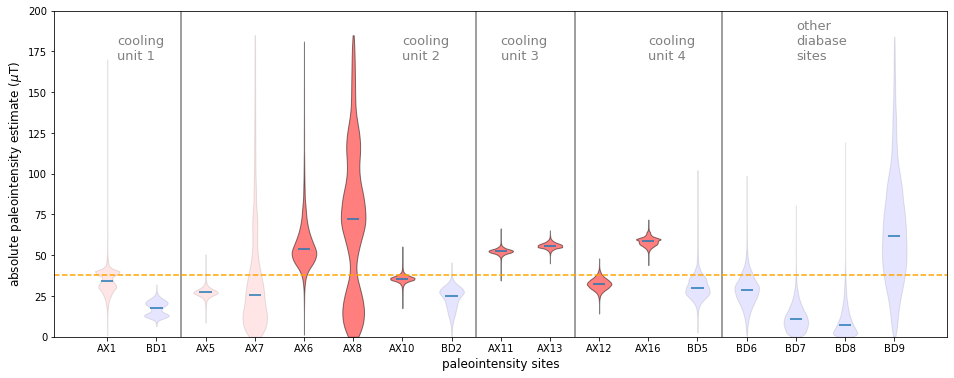

In [41]:
fig, ax = plt.subplots(figsize=(16,6))

parts = ax.violinplot(concat_frame.T, positions=range(concat_frame.shape[1]), showmedians=True,
        showextrema=False)

for i in range(concat_frame.shape[1]):
    this_site = cooling_unit_group[i]
    this_acept = accept[i]
    this_color = 'grey'
    this_alpha = 1
    
    if 'AX' in this_site:
        this_color = 'red'
    else:
        this_color = 'blue'
        
    
    if this_acept == 1:
        this_alpha = 0.5
    else:
        this_alpha = 0.1
    
    pc = parts['bodies'][i]
    pc.set_facecolor(this_color)
    pc.set_edgecolor('black')
    pc.set_alpha(this_alpha)
    
    if i < concat_frame.shape[1] and 'BD' in this_site and 'AX' in cooling_unit_group[i-1]:
        ax.axvline(i+0.5, color = 'grey', alpha = 1, ls='-')
        
    if 'AX13' in this_site:
        ax.axvline(i+0.5, color = 'grey', alpha = 1, ls='-')

plt.axhline(np.mean(concat_frame.mean(axis=1)), color='orange', ls='--',)

plt.text(0.2,170, 'cooling\nunit 1', color = 'grey', alpha = 1, fontsize=13)
plt.text(6,170, 'cooling\nunit 2', color = 'grey', alpha = 1, fontsize=13)
plt.text(8,170, 'cooling\nunit 3', color = 'grey', alpha = 1, fontsize=13)
plt.text(11,170, 'cooling\nunit 4', color = 'grey', alpha = 1, fontsize=13)
plt.text(14,170, 'other\ndiabase\nsites', color = 'grey', alpha = 1, fontsize=13)


plt.ylim(0, 200)
plt.xticks(ticks = range(len(cooling_unit_group)), labels = cooling_unit_group)
plt.ylabel('absolute paleointensity estimate ($\mu$T)', fontsize=12)
plt.xlabel('paleointensity sites', fontsize=12)

plt.savefig('code_output/AX_BD_BiCEP.pdf',bbox_inches='tight')
plt.show()

0        42.126342
1        35.566932
2        36.820680
3        45.013251
4        37.799934
           ...    
19995    40.166228
19996    39.229877
19997    41.418870
19998    46.850084
19999    45.701110
Length: 20000, dtype: float64